In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy
#import scipy.fftpack

# Função auxiliar para fazer gráficos
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

# Amostragem de uma função de teste

Seja uma onda com:

* Frequência de 1 Hz
* Amplitude de 5

Vamos amostrar (registar dados):

* A 10 amostras por segundo
* Durante 3 segundos
* Logo um total de 30 amostras

In [2]:
taxa_amostragem = 10 # samples per sec
tempo_total_de_amostragem = 3
num_amostras = taxa_amostragem * tempo_total_de_amostragem

t = np.linspace(0, tempo_total_de_amostragem, num_amostras)

# entre x = 0 e x = 1, uma revolução completa (2 pi) foi feita, logo este é um
# sinal a 1 Hz , com amplitude  5
frequencia_em_hz = 1
amplitude_onda = 5
f = lambda x: amplitude_onda * np.sin(frequencia_em_hz * 2*np.pi*x)
    
f_amostradas = [f(i) for i in t]

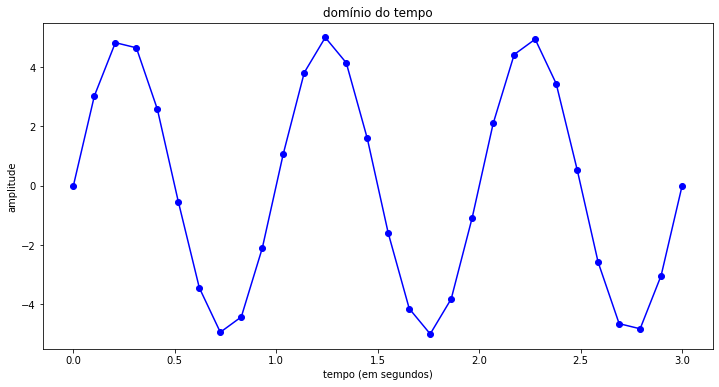

In [3]:
setup_graph(title='domínio do tempo', x_label='tempo (em segundos)', y_label='amplitude', fig_size=(12,6))
_ = plt.plot(t, f_amostradas, 'bo-')

# Fazer a fft

In [4]:
fft_output = np.fft.fft(f_amostradas)

/Users/cauaveiga/miniforge3/envs/labs/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


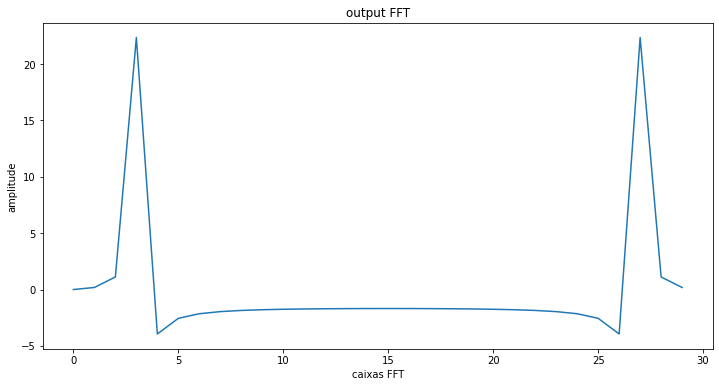

In [5]:
setup_graph(title='output FFT', x_label='caixas FFT', y_label='amplitude', fig_size=(12,6))
_ = plt.plot(fft_output)

# Porque é o resultado simétrico?

* Porque é uma tranformada de Fourier de input complexo, e para input real, a segunda metade será sempre a imagem ao espelho.
* Para input real, o output da fft será sempre simétrico.
* Como vamos lidar nesta aula apenas com inputs reais, vamos usar a versão para input real da fft.

In [6]:
rfft_output = np.fft.rfft(f_amostradas)

/Users/cauaveiga/miniforge3/envs/labs/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


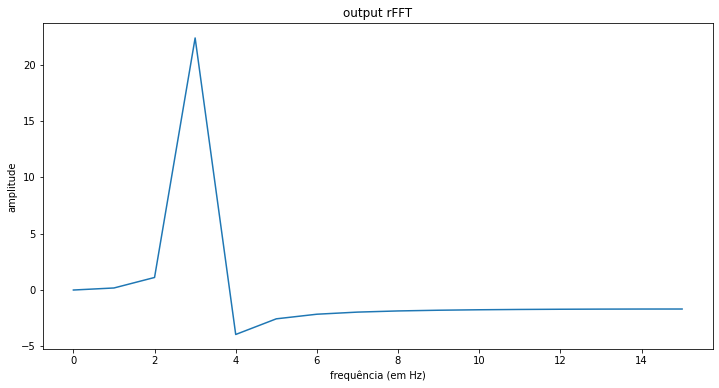

In [7]:
setup_graph(title='output rFFT', x_label='frequência (em Hz)', y_label='amplitude', fig_size=(12,6))
_ = plt.plot(rfft_output)

# Corrigir o rótulo no eixo dos xx

## Queremos que o eixo dos xx represente frequência

Na nossa equação para a DFT $$x(\frac{n}{N}) = \sum_{k=0}^{N-1} X(k) e^{i 2 \pi k \frac{n}{N} }$$

* $x(\frac{n}{N})$ representa o output da DFT para a frequência que passa por  $\frac{n}{N}$ ciclos por amostra.
* E tomamos essas frequências de 0 até (número total de amostras dividido por 2)

In [8]:
# Para obter as frequências certas no eixo dos xx
rfreqs = [(i*1.0/num_amostras)*taxa_amostragem for i in range(num_amostras//2+1)]

### Frequências vão de 0 até à Frequência de amostragem (taxa de amostragem / 2)

In [9]:
# Assim, as nossas frequências vão de 0 até 5Hz.  5 é metade da taxa de amostragem,
# que é o que devia ser (Frequência de Nyquist).
rfreqs

[0.0,
 0.3333333333333333,
 0.6666666666666666,
 1.0,
 1.3333333333333333,
 1.6666666666666665,
 2.0,
 2.3333333333333335,
 2.6666666666666665,
 3.0,
 3.333333333333333,
 3.6666666666666665,
 4.0,
 4.333333333333334,
 4.666666666666667,
 5.0]

/Users/cauaveiga/miniforge3/envs/labs/lib/python3.9/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


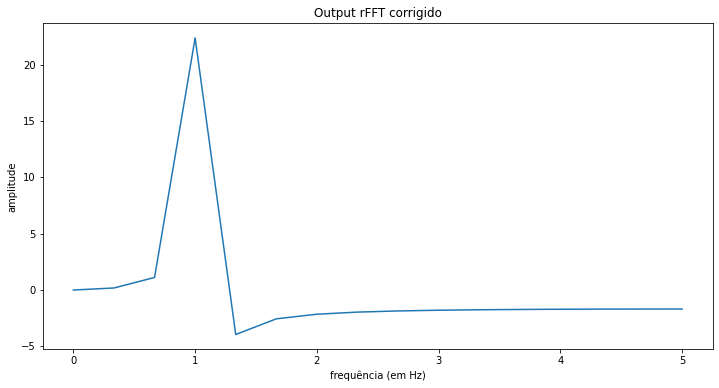

In [10]:
setup_graph(title='Output rFFT corrigido', x_label='frequência (em Hz)', y_label='amplitude', fig_size=(12,6))
_ = plt.plot(rfreqs, rfft_output)

# Corrigir o rótulo no eixo dos yy

## Queremos que o eixo dos yy represente grandeza

Estamos a obter valores negativos, e parece que a nossa amplitude é bem maior que o que deveria ser (que é 5).

A grandeza de cada componente é:

$$\mathrm{grandeza}(i) = \frac{\sqrt{i.\mathrm{real}^2 + i.\mathrm{imag}^2}}{N}$$

In [11]:
rfft_mag = [np.sqrt(i.real**2 + i.imag**2)/len(rfft_output) for i in rfft_output]

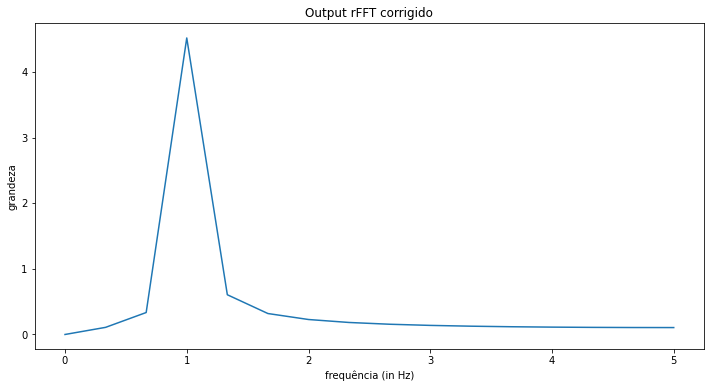

In [12]:
setup_graph(title='Output rFFT corrigido', x_label='frequência (in Hz)', y_label='grandeza', fig_size=(12,6))
_ = plt.plot(rfreqs, rfft_mag)

# FFT inversa

Podemos tomar o output da FFT e fazer uam FFT Inversa para obter de volta a onda original (usando a FFT Real Inversa - irfft).

In [13]:
irfft_output = np.fft.irfft(rfft_output)

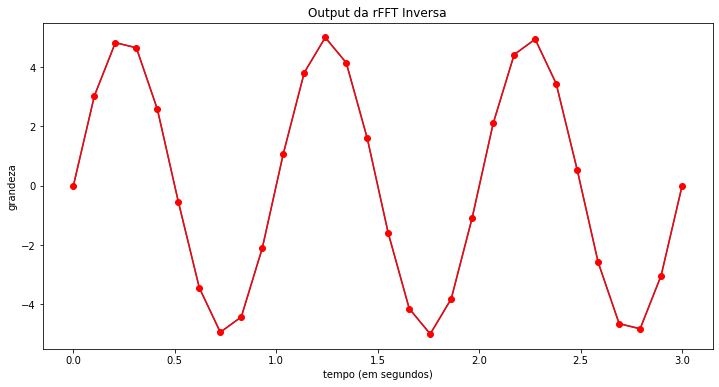

In [14]:
setup_graph(title='Output da rFFT Inversa', x_label='tempo (em segundos)', y_label='grandeza', fig_size=(12,6))
_ = plt.plot(t, irfft_output,t, f_amostradas, 'ro-')

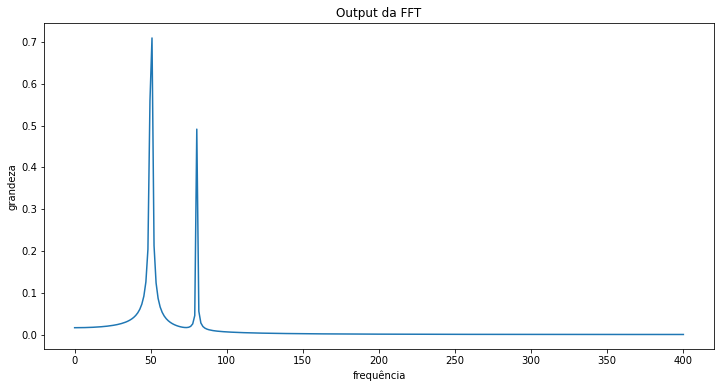

In [15]:
# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0  #dt


x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
#yf = scipy.fftpack.fft(y)
yf = np.fft.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

setup_graph(title='Output da FFT', x_label='frequência', y_label='grandeza', fig_size=(12,6))
_ = plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
#fig, ax = plt.subplots()
#ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
#plt.show()

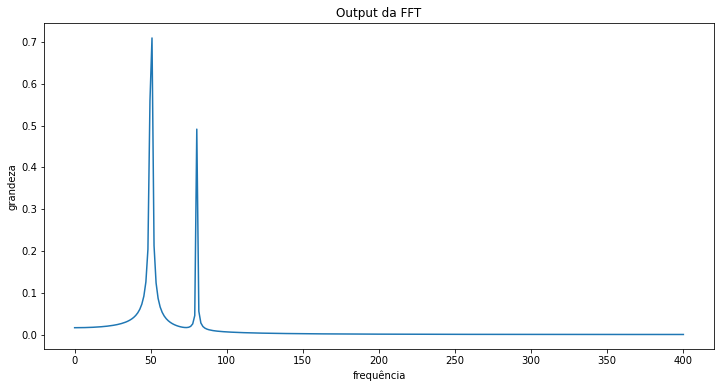

In [17]:
# Tmax =>>> N=Tmax/dt
# tempo = dt*N


janela = 6/8

# Number of samplepoints
N = 600
# sample spacing
T = janela/N  #dt


x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
#yf = scipy.fftpack.fft(y)
yf = np.fft.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

setup_graph(title='Output da FFT', x_label='frequência', y_label='grandeza', fig_size=(12,6))
_ = plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
#fig, ax = plt.subplots()
#ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
#plt.show()